# Import Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import plotly.express as px
import seaborn as sns
import warnings
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [4]:
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import PredefinedKFold
from sklearn.decomposition import NMF

In [5]:
warnings.filterwarnings("ignore")


# Dataset

In [ ]:
# Original Dataset load (266MB) - 6 months long Glovo orders in BCN from Jul 1st to Dec 31st 2021

In [6]:
df = pd.read_csv ('data/orders 2022-03-05T1431.csv')

In [24]:
df.shape

(2460001, 15)

In [25]:
df.head(100)

,Unnamed: 0,Code,Store Name,Store ID,Termination Local Date,Termination Local Time,Total Purchase,ID,Registration Age Range,Made More Than One Order (Yes / No),Last Order Date,Staff (Yes / No),Top Fifty (Yes / No),Rating Store Service,Positive Store Service (Yes / No)
0,1,B3JKGPPT,Five Guys,223524.0,2021-12-30,2021-12-30 12:59:24,11.5,861650.0,NaN,Yes,2021-12-30,No,No,Missing,No
1,2,BBRACYGD,Parking Pizza,1419.0,2021-12-30,2021-12-30 13:25:22,14.0,444732.0,NaN,Yes,2022-03-04,No,Yes,Positive,Yes
2,3,BSMP18DY,Crep Nova,97780.0,2021-12-30,2021-12-30 21:14:14,25.6,619969.0,25.0,Yes,2022-03-02,No,Yes,Positive,Yes
3,4,B3EQU1C8,McDonald's®,9487.0,2021-12-30,2021-12-30 22:42:29,16.2,1784091.0,50.0,Yes,2022-02-27,No,No,Missing,No
4,5,BRG4B1PG,TexMex & Co,2122.0,2021-12-30,2021-12-30 21:39:17,28.85,6715.0,NaN,Yes,2022-01-23,No,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,B1VLURKR,Metropolitan Gourmet Burgers,40961.0,2021-12-30,2021-12-30 14:04:42,71.0,9749772.0,NaN,Yes,2022-03-01,No,No,Missing,No
96,97,B8PLTJMW,McDonald's®,9487.0,2021-12-30,2021-12-30 21:01:11,10.5,58048.0,NaN,Yes,2022-03-04,No,No,Positive,Yes
97,98,BVWZGWJC,Envols-Poké Bowls,118386.0,2021-12-30,2021-12-30 13:34:50,13.65,100490.0,NaN,Yes,2022-03-04,No,No,Positive,Yes
98,99,BL1LL1U5,Bonrollo,3116.0,2021-12-30,2021-12-30 21:15:34,9.5,19691738.0,NaN,Yes,2022-02-28,No,No,Missing,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460001 entries, 0 to 2460000
Data columns (total 15 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           object 
 1   Code                                 object 
 2   Store Name                           object 
 3   Store ID                             float64
 4   Termination Local Date               object 
 5   Termination Local Time               object 
 6   Total Purchase                       object 
 7   ID                                   float64
 8   Registration Age Range               float64
 9   Made More Than One Order (Yes / No)  object 
 10  Last Order Date                      object 
 11  Staff (Yes / No)                     object 
 12  Top Fifty (Yes / No)                 object 
 13  Rating Store Service                 object 
 14  Positive Store Service (Yes / No)    object 
dtypes: float64(3), object(12)
memory

In [6]:
# Identificando NAs
df.isna().sum()

Unnamed: 0                                   0
Code                                         1
Store Name                                   1
Store ID                                     1
Termination Local Date                       1
Termination Local Time                       1
Total Purchase                               1
ID                                           1
Registration Age Range                 2004561
Made More Than One Order (Yes / No)          1
Last Order Date                             63
Staff (Yes / No)                             1
Top Fifty (Yes / No)                         1
Rating Store Service                         1
Positive Store Service (Yes / No)            1
dtype: int64

In [35]:
# Identifying row with NAs
df.drop('Registration Age Range',axis=1).isna()==True

,Unnamed: 0,Code,Store Name,Store ID,Termination Local Date,Termination Local Time,Total Purchase,ID,Made More Than One Order (Yes / No),Last Order Date,Staff (Yes / No),Top Fifty (Yes / No),Rating Store Service,Positive Store Service (Yes / No)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459998,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2459999,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# Identified row 2460000 as all NAs
df.loc[2460000]

Unnamed: 0                             SQL Error: ERROR: Query (77073085) cancelled b...
Code                                                                                 NaN
Store Name                                                                           NaN
Store ID                                                                             NaN
Termination Local Date                                                               NaN
Termination Local Time                                                               NaN
Total Purchase                                                                       NaN
ID                                                                                   NaN
Registration Age Range                                                               NaN
Made More Than One Order (Yes / No)                                                  NaN
Last Order Date                                                                      NaN
Staff (Yes / No)     

In [7]:
# I'm droping this one row as it's only one over 2M
df.drop([2460000], axis=0, inplace=True)

In [8]:
# Counterproof of NAs
df.isna().sum()

Unnamed: 0                                   0
Code                                         0
Store Name                                   0
Store ID                                     0
Termination Local Date                       0
Termination Local Time                       0
Total Purchase                               0
ID                                           0
Registration Age Range                 2004560
Made More Than One Order (Yes / No)          0
Last Order Date                             62
Staff (Yes / No)                             0
Top Fifty (Yes / No)                         0
Rating Store Service                         0
Positive Store Service (Yes / No)            0
dtype: int64

In [38]:
#Checking information regarding Age Range
df['Registration Age Range'].value_counts()

30.0     141758
25.0     119350
35.0      87945
40.0      47185
45.0      23206
20.0      17861
50.0       9899
55.0       3748
60.0       1538
115.0       608
105.0       567
65.0        559
70.0        360
110.0       221
100.0       164
75.0        150
90.0        138
15.0         74
95.0         39
80.0         36
85.0         34
Name: Registration Age Range, dtype: int64

In [39]:
df['Positive Store Service (Yes / No)'].value_counts()

No     1484266
Yes     975734
Name: Positive Store Service (Yes / No), dtype: int64

In [ ]:
# Creation of a smaller dataset

In [40]:
df1 = df[['Code','Store Name','ID','Positive Store Service (Yes / No)']]

In [41]:
df1.to_csv('data\df_matrix.csv',index=False)

In [10]:
df1.shape

(2460000, 4)

# Matrix Dataset Exploration

In [7]:
# Dataset load
df1 = pd.read_csv ('data/df_matrix.csv')

In [44]:
df1.head(10)

,Code,Store Name,ID,Positive Store Service (Yes / No)
0,B3JKGPPT,Five Guys,861650.0,No
1,BBRACYGD,Parking Pizza,444732.0,Yes
2,BSMP18DY,Crep Nova,619969.0,Yes
3,B3EQU1C8,McDonald's®,1784091.0,No
4,BRG4B1PG,TexMex & Co,6715.0,Yes
5,BCBA18DC,Kebab Nepolis Pizza,243807.0,No
6,BQM2M11H,Secrets By Farga,159806.0,Yes
7,B37MGPNM,VICIO,60988.0,No
8,BPE66S4D,McDonald's®,43750.0,No
9,BFVLQGAL,Yoüme Sushi,1423043.0,No


In [36]:
# Checking for NAs
df1.isna().sum()

Code                                 0
Store Name                           0
ID                                   0
Positive Store Service (Yes / No)    0
dtype: int64

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460000 entries, 0 to 2459999
Data columns (total 4 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Code                               object 
 1   Store Name                         object 
 2   ID                                 float64
 3   Positive Store Service (Yes / No)  object 
dtypes: float64(1), object(3)
memory usage: 93.8+ MB


Text(0.5, 1.0, 'Distribution of votes')

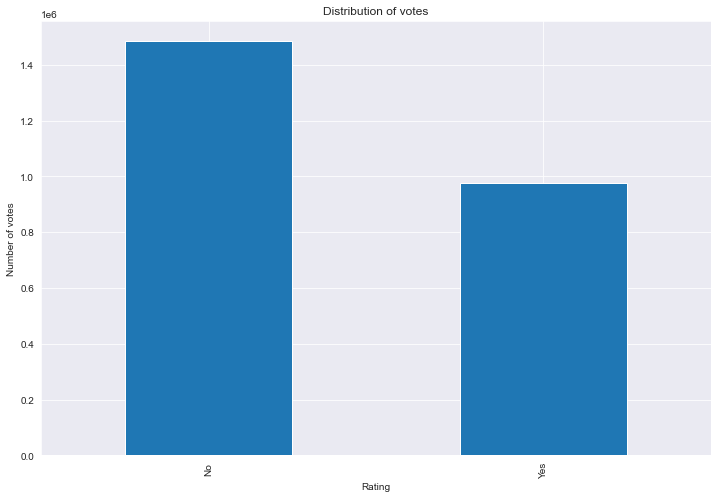

In [59]:
# Visualization of the distribution of votes to check how balanced the metric is
ratings_count = df1['Positive Store Service (Yes / No)'].value_counts()
plt.figure(figsize=(12,8))
ax = ratings_count.plot.bar()
ax.set_xlabel("Rating")
ax.set_ylabel("Number of votes");
ax.set_title("Distribution of votes")

In [8]:
# Renaming the Rating column
df1.rename(columns = {'Positive Store Service (Yes / No)':'rating'}, inplace = True)

In [9]:
# Transforming Positive Evaluation into number
df1['rating'] = df1['rating'].apply(lambda x: 1 if x=='Yes' else 0)

In [10]:
df1['rating'].value_counts()

0    1484266
1     975734
Name: rating, dtype: int64

In [11]:
df_rating = df1[df1['rating']==1]
df_rating = df_rating.groupby(['Store Name'])['rating'].count().sort_values(ascending=False).head(10)
df_ratings = pd.DataFrame(df_rating).reset_index()
df_ratings

,Store Name,rating
0,McDonald's®,111638
1,Glovo Express,56410
2,KFC,45390
3,VICIO,20574
4,Yoüme Sushi,19758
5,Gonzalez & Co,18273
6,Goiko,17356
7,Honest Greens,16994
8,Five Guys,16319
9,Burger King,15197


Text(0.5, 1.0, 'Top 10 Positive Rated Stores')

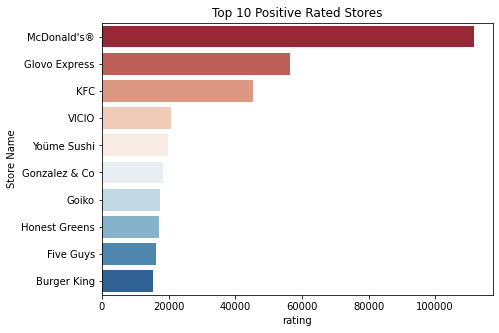

In [124]:
# Top 10 Rated Restaurants
plt.figure(figsize=(7,5))
sns.barplot(data=df_ratings, x='rating', y='Store Name', palette='RdBu')
plt.title('Top 10 Positive Rated Stores')

In [33]:
# Top 50 stores with more Orders
df1.groupby(['Store Name'])['Code'].count().sort_values(ascending=False).head(50)

Store Name
McDonald's®                346060
KFC                        130862
Glovo Express              128973
VICIO                       50244
Goiko                       48533
Yoüme Sushi                 48102
Five Guys                   43300
Gonzalez & Co               42983
Burger King                 42002
Honest Greens               41025
UDON                        36477
La Tagliatella              30121
TGB                         23861
Subway                      22410
Papa John's                 21694
Crep Nova                   19585
Pans & Company              18865
Sports Bar Italian Food     18778
Carrefour                   17922
Healthy Poke                17369
Chalito                     15604
Telepizza                   15295
Taco Bell                   14677
Secrets By Farga            13927
Can Pizza                   13261
NAP                         11971
Petit Bangkok               11248
Takumi Ramen & Yakisoba     10757
TEIKIT Sushi Fusion         10346
Sta

In [22]:
# Checking how many different restaurants the dataset has: 2830 
df1['Store Name'].value_counts()

McDonald's®                             346060
KFC                                     130862
Glovo Express                           128973
VICIO                                    50244
Goiko                                    48533
                                         ...  
Trieste Horta Doner Kebab y Pizzeria         1
Café del sol                                 1
3 Monkeys                                    1
Golat Helados                                1
Las Quecas                                   1
Name: Store Name, Length: 2830, dtype: int64

In [26]:
# Checking how many different users the dataset has: 391.554
df1['ID'].value_counts()

156531.0      1633
1600826.0      299
633979.0       272
24634271.0     233
17470.0        225
              ... 
13222967.0       1
51202396.0       1
25023809.0       1
57618461.0       1
76520713.0       1
Name: ID, Length: 391554, dtype: int64

In [12]:
# Transforming ID column to Int and to String
df1['ID']= df1['ID'].astype(int)
df1['ID']= df1['ID'].astype(str)

In [13]:
df1['ID'].value_counts()

156531      1633
1600826      299
633979       272
24634271     233
17470        225
            ... 
13222967       1
51202396       1
25023809       1
57618461       1
76520713       1
Name: ID, Length: 391554, dtype: int64

# First Feature Selection

In [14]:
# Dataframe of number of orders of the same restaurant by User
df_orders = df1.groupby(['ID','Store Name'])['Code'].count().reset_index()
df_orders

,ID,Store Name,Code
0,10000225,Can Pizza,1
1,10000251,La Pepa,1
2,10000251,La Tagliatella,2
3,10000251,McDonald's®,5
4,10000251,UDON,1
...,...,...,...
1415287,9999977,Teke Factory,3
1415288,9999977,Thai Munch,2
1415289,9999977,The Real Greek,1
1415290,9999977,VICIO,5


In [15]:
# Dataframe of grouping of restaurants by User 
df_users = df_orders.groupby(['ID']).count().reset_index()
df_users

,ID,Store Name,Code
0,10000225,1,1
1,10000251,4,4
2,10000368,1,1
3,100004774,1,1
4,1000056,1,1
...,...,...,...
391549,99995670,1,1
391550,999960,1,1
391551,999972,5,5
391552,9999920,2,2


In [11]:
# First assumption to consider only Users with a minimum number of orders: 25
min_orders = 25
print("Number of users that have more than {} orders: {}".format(min_orders, len(df_orders[df_orders[('Code')]>=min_orders])))

Number of users that have more than 25 orders: 1084


In [16]:
# Dataframe assuming 25 orders at least per user
df_min_orders = df_orders[df_orders['Code']>=25]
df_min_orders

,ID,Store Name,Code
435,10013599,Glovo Express,45
662,10020400,Glovo Express,38
728,10021791,Glovo Express,58
2775,10069769,Gonzalez & Co,26
3353,1008397,Glovo Express,28
...,...,...,...
1407258,9752,McDonald's®,26
1407465,9756185,Glovo Express,34
1410831,9856804,Glovo Express,65
1412225,9905430,Glovo Express,30


In [77]:
# Checking the number of Restaurants with this selection: 163
df_min_orders['Store Name'].value_counts()

Glovo Express        441
McDonald's®          207
Honest Greens         36
Starbucks             25
KFC                   23
                    ... 
El Sabor Pizzería      1
El Clot                1
Dumplings              1
Doña Jacinta           1
llaollao               1
Name: Store Name, Length: 163, dtype: int64

In [32]:
orders = df_min_orders[('Code')].values
orders

array([ 25,  25,  25, ..., 144, 152, 268], dtype=int64)

In [71]:
df_stores = df_min_orders.groupby(['Store Name']).count().reset_index()
df_stores

,Store Name,ID,Code
0,Anita Gelato,2,2
1,Meal&1 Healthy Food,2,2
2,2020 Glory's Bakery & Coffee Shop,1,1
3,365 Obrador,11,11
4,4 Pokes,1,1
...,...,...,...
158,VIPS,1,1
159,Wok Show,1,1
160,Wynwood Café,2,2
161,Yoüme Sushi,10,10


In [74]:
# df_stores.sort_values(by=['Code'], inplace=False, ascending=False).head(15)
stores = df_stores.sort_values(by=['Code'], inplace=False, ascending=False).reset_index()
stores

,Store Name,ID,Code
0,Glovo Express,441,441
1,McDonald's®,207,207
2,Honest Greens,36,36
3,Starbucks,25,25
4,KFC,23,23
...,...,...,...
158,El Sabor Pizzería,1,1
159,El Clot,1,1
160,Dumplings,1,1
161,Doña Jacinta,1,1


In [45]:
store = df_min_orders['Store Name'].value_counts().head(15)
store

Glovo Express          441
McDonald's®            207
Honest Greens           36
Starbucks               25
KFC                     23
Gonzalez & Co           21
Faborit                 15
Oakberry Açaí Bowls     15
Pans & Company          14
Subway                  13
365 Obrador             11
Yoüme Sushi             10
TGB                     10
Secrets By Farga         8
Carrefour                8
Name: Store Name, dtype: int64

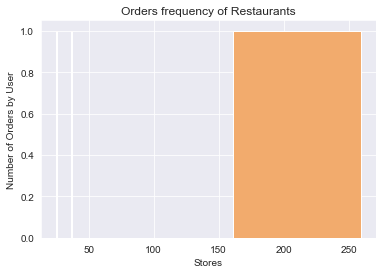

In [65]:
plot.hist(x=store, bins=orders, color='#F2AB6D', rwidth=0.85)
plot.title('Orders frequency of Restaurants')
plot.xlabel('Stores')
plot.ylabel('Number of Orders by User')
plot.show()

In [88]:
numero_intervalos = max(orders) - min(orders) + 50
histograma = px.histogram(orders,
                          nbins=numero_intervalos,
                          title='Orders Frequency by User',
                          color_discrete_sequence=['#F2AB6D'])

# configuramos las etiquetas de los ejes
histograma.update_layout(
    xaxis_title="Orders by User",
    yaxis_title="Restaurants"
)

histograma.show()

ValueError: 
    Invalid value of type 'numpy.int64' received for the 'nbinsx' property of histogram
        Received value: 293

    The 'nbinsx' property is a integer and may be specified as:
      - An int (or float that will be cast to an int)
        in the interval [0, 9223372036854775807]

Text(0.5, 1.0, 'Distribution of votes by rating')

<Figure size 864x576 with 0 Axes>

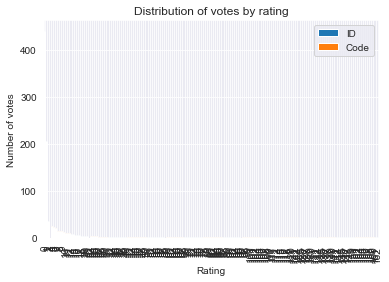

In [75]:
# ratings_count = df_ratings['rating'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(12,8))
ax = stores.plot.bar()
ax.set_xlabel("Rating")
ax.set_ylabel("Number of votes");
ax.set_title("Distribution of votes by rating")

Text(0, 0.5, 'Restaurants')

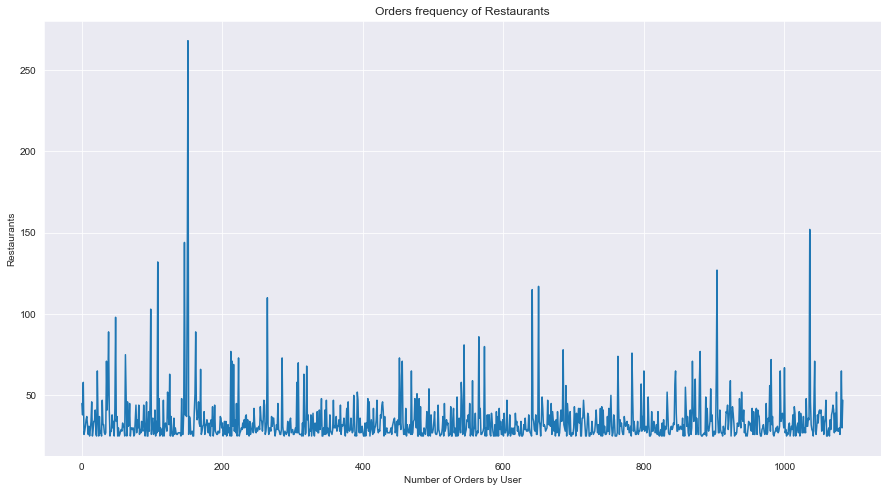

In [20]:
# Orders Frequency Vistualization
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.lineplot(data=df_min_orders[('Code')].values)
plt.title("Orders frequency of Restaurants")
plt.xlabel("Number of Orders by User")
plt.ylabel("Restaurants")

In [18]:
# Building a first Matrix through pivot table
matrix = df_min_orders.pivot(index='ID',columns='Store Name',values='Code').fillna(0)
matrix

Store Name,Anita Gelato,Meal&1 Healthy Food,2020 Glory's Bakery & Coffee Shop,365 Obrador,4 Pokes,Acai&Me Plaza De La LLana,Al Karma,Andreu,Armando by Fismuler,Bacoa,...,Tramonti 1980,Trópico Brunch,UDON,UMĒ SUSHI,VICIO,VIPS,Wok Show,Wynwood Café,Yoüme Sushi,llaollao
ID,,,,,,,,,,,,,,,,,,,,,
10013599.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10020400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10021791.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10069769.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008397.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9756185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9856804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# Checking values sum
orderspivot = df_min_orders.pivot(index='ID',columns='Store Name',values='Code').sum()
orderspivot

Store Name
 Anita Gelato                         57.0
 Meal&1 Healthy Food                  55.0
2020 Glory's Bakery & Coffee Shop     32.0
365 Obrador                          540.0
4 Pokes                               27.0
                                     ...  
VIPS                                  28.0
Wok Show                              26.0
Wynwood Café                          57.0
Yoüme Sushi                          304.0
llaollao                              26.0
Length: 163, dtype: float64

In [ ]:
# Dataframes is too filtered and the matrix is not relevant, so I will go back and try a different approach

# Second Feature Selection

In [66]:
# Selection of Users (showing top 50) of grouped restaurants dataframe by User
df_top_users = df_users.sort_values('Store Name', ascending=False).head(50)
df_top_users

,ID,Store Name,Code
48267,156531,366,366
45359,15225701,97,97
185306,43176605,76,76
171159,4020042,75,75
83686,2119350,71,71
166627,3933793,69,69
280509,62241024,67,67
12350,11346703,66,66
17204,11830720,65,65
130856,30706737,65,65


In [67]:
# Checking how many users we have in the Orders Dataframe that are in the Top Users visualization: 3314
df_orders['ID'].isin(df_top_users['ID']).sum()

3314

In [81]:
# It looks better than the first selection, saving it into a new dataframe
df_orderfinal = df_orders[df_orders['ID'].isin(df_top_users['ID'])]
df_orderfinal

,ID,Store Name,Code
414,10013599,Anita Gelato,3
415,10013599,2254 Tapas,1
416,10013599,Armando by Fismuler,1
417,10013599,Baluard Barceloneta,2
418,10013599,BarcelonaMilano,2
...,...,...,...
1295004,8551256,Tokuni Sushi,1
1295005,8551256,Tortitas & Crepes Bcn,1
1295006,8551256,TuCachapa.com,1
1295007,8551256,Tío Bigotes,3


In [113]:
# Checking how many different restaurants this selection is showing: 1113
df_orderfinal['Store Name'].value_counts()

Glovo Express            40
McDonald's®              36
VICIO                    28
KFC                      28
Five Guys                26
                         ..
Elche Restaurant          1
Wok Point Sushi           1
Trattoria O' Principe     1
Thai Jasmine              1
Tortitas & Crepes Bcn     1
Name: Store Name, Length: 1113, dtype: int64

Text(0.5, 0, 'Number of orders')

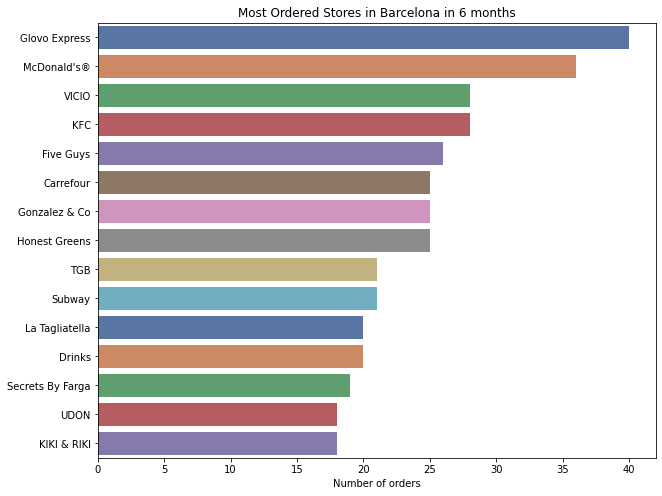

In [33]:
# Most Ordered Stores
plt.figure(figsize=(10,8))
chains=df_orderfinal['Store Name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most Ordered Stores in Barcelona in 6 months")
plt.xlabel("Number of orders")

# SVD Model

In [82]:
# Using the load_from_df() method and creating a Reader object
reader = Reader()
data = Dataset.load_from_df(df_orderfinal[['ID', 'Store Name', 'Code']], reader)

In [72]:
model = SVD()

In [75]:
results = cross_validate(model, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7851  6.5354  8.5119  5.9441  2.3750  
Fit time          0.38    0.33    0.29    0.33    0.03    
Test time         0.02    0.01    0.02    0.02    0.00    


In [76]:
trainset = data.build_full_trainset()

In [77]:
model.fit(trainset)

In [89]:
# to create a funcion por user ID
# my_order = BFPKLXMU

user_id = str(int(df['ID'].loc[df['Code'] == 'BFPKLXMU'].iloc[0]))
user_id

'4456210'

In [107]:
# Selection of random ID for model testing
# user_id = df_orderfinal.sample()
# user_id

,ID,Store Name,Code
636944,38623,Chickoa by Paco Perez,1


In [96]:
# List of restaurants of which user has already ordered
my_list = set(list(df_orders[df_orders['ID']==user_id]['Store Name'].unique()))
my_list

{'Bisma Kebabish',
 'Curry Time',
 'Del Poble Pizzeria',
 'Elements Healthy Food',
 'Glovo Express',
 'Healthy Pleasure',
 'Mamá Silvia',
 'Motomaki & Sushi',
 'Ready Curry',
 'Rey De Ali Baba Kebab',
 'Secrets By Farga',
 'Sopa De Ramen',
 'Sushi Way',
 'The Fresh Poke',
 'The Real Kebab'}

In [97]:
# List of all Store Names
store_names = set(df_orders['Store Name'].unique())
store_names

{'Sabor Mexicano',
 'Restaurante Thai Pinto',
 "Restaurant L'Enric",
 'Si O Si',
 'INDIAN PALACE',
 'D. Fénix Sushi',
 'Turk Pizza',
 'Sushi Santalo',
 'Best Kebab',
 'La Sagrada',
 'Empanadas Caseras',
 'Barra Brava',
 'Messié Pizza',
 "L'Anxaneta Pollos a l'Ast",
 'Sagradas Tapas',
 'Bodega Montferry',
 'Lunch and Catering',
 'Bam Bam Doner Kebab',
 'Omu',
 'Croqueta & Cro',
 'GREENS',
 'Orimaki Sushi',
 'Mantequerías Pirenaicas',
 'Arleen Mexicana',
 'CASA MASANA',
 'Yusushi',
 'Churrería El Buen Gusto',
 'Delhi Sweets And India Restaurant',
 'Frankfurt y Hamburgueseria El Sot',
 'Taco Rico',
 'Birrieria Dos Coyotes',
 'Ramen House',
 'Changqing Restaurante China',
 'La Picnic',
 'Pollo Campero',
 'Titak',
 'Ají Panca Restaurante',
 'Sushi Day',
 'Lahore Restaurant Authentic Pakistani Halal And Indian',
 'Colombia Pan y Sabor Villarroel',
 'Espak Salud',
 'Indian Food',
 'Falafel Pedralbes',
 'Shingari Sushi Carrer Del General Weyler',
 'Virona 4',
 'Duram Rico',
 'Restaurant Ruta 6

In [98]:
# List of Restaurants not ordered yet by the selected user
not_ordered_stores  = store_names - my_list
not_ordered_stores

{'Sabor Mexicano',
 'Restaurante Thai Pinto',
 "Restaurant L'Enric",
 'Si O Si',
 'INDIAN PALACE',
 'D. Fénix Sushi',
 'Turk Pizza',
 'Sushi Santalo',
 'Best Kebab',
 'La Sagrada',
 'Empanadas Caseras',
 'Barra Brava',
 'Messié Pizza',
 "L'Anxaneta Pollos a l'Ast",
 'Sagradas Tapas',
 'Bodega Montferry',
 'Lunch and Catering',
 'Bam Bam Doner Kebab',
 'Omu',
 'Croqueta & Cro',
 'GREENS',
 'Orimaki Sushi',
 'Mantequerías Pirenaicas',
 'Arleen Mexicana',
 'CASA MASANA',
 'Yusushi',
 'Churrería El Buen Gusto',
 'Delhi Sweets And India Restaurant',
 'Frankfurt y Hamburgueseria El Sot',
 'Taco Rico',
 'Birrieria Dos Coyotes',
 'Ramen House',
 'Changqing Restaurante China',
 'La Picnic',
 'Pollo Campero',
 'Titak',
 'Ají Panca Restaurante',
 'Sushi Day',
 'Lahore Restaurant Authentic Pakistani Halal And Indian',
 'Colombia Pan y Sabor Villarroel',
 'Espak Salud',
 'Indian Food',
 'Falafel Pedralbes',
 'Shingari Sushi Carrer Del General Weyler',
 'Virona 4',
 'Duram Rico',
 'Restaurant Ruta 6

In [119]:
# Creating a function that generates the list of recommended restaurants for the selected user
recommendations = []
for restaurant in not_ordered_stores:
    model.predict(user_id, restaurant)
    prediction = model.predict(user_id, restaurant).est
    recommendations.append({'Restaurant':restaurant, 'value':prediction})

In [122]:
# Putting the results into a dataframe of top 5 Recommended restaurants
df_recommendations = pd.DataFrame(recommendations)
top_recommendations = df_recommendations.sort_values('value',ascending=False).head(5)
top_recommendations

,Restaurant,value
1949,Starbucks,5.000000
2538,McDonald's®,4.928354
511,Honest Greens,4.251232
921,Five Guys,4.021572
419,Gonzalez & Co,4.016491


In [ ]:
# Testing without Mc Donald's, Starbucks, KFC

In [102]:
bias = df_orderfinal[df_orderfinal['Store Name']==["McDonald's®","Starbucks","KFC"]

In [103]:
df_orderfinal2 = df_orderfinal[df_orderfinal['Store Name']!=bias]
df_orderfinal2

ValueError: ('Lengths must match to compare', (3314,), (3,))

In [ ]:
# Testing other Models

In [84]:
benchmark = []
algorithms = [SVD(), SlopeOne(), KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly(), CoClustering()]

for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n")

print ('\n\tDONE')

Done:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000002A7F686B220> 

Done:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x000002A7F686B340> 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Done:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x000002A7F686B250> 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Done:  <surprise.prediction_algorithms.knns.KNNBasic object at 0x000002A7F686B2B0> 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix..

In [85]:
# Comparing different results, KNN Basic is performing best
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SlopeOne,5.938679,0.025261,0.028590
CoClustering,6.036068,0.189923,0.006899
BaselineOnly,6.085219,0.004335,0.005316
KNNBaseline,6.193989,0.012399,0.026583
SVD,6.196555,0.223867,0.010636
KNNWithZScore,6.218831,0.007655,0.026587
KNNBasic,6.271433,0.001330,0.013977


# KNN Model

In [91]:
data_train, data_test = train_test_split(data, test_size = 0.25, random_state = 0)

In [93]:
model = KNNBasic()

In [94]:
trainset = data.build_full_trainset()

In [95]:
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [99]:
# Creating a function that generates the list of recommended restaurants for the selected user
recommendations = []
for restaurant in not_ordered_stores:
    model.predict(user_id, restaurant)
    prediction = model.predict(user_id, restaurant).est
    recommendations.append({'Restaurant':restaurant, 'value':prediction})

In [100]:
# Putting the results into a dataframe of top 5 Recommended restaurants
df_recommendations_knn = pd.DataFrame(recommendations)
top_recommendations_knn = df_recommendations_knn.sort_values('value',ascending=False).head(5)
top_recommendations_knn

,Restaurant,value
0,Sabor Mexicano,2.315631
1880,Panepizza,2.315631
1872,Oassis Natural Cooking,2.315631
1873,Pizza Pozzuoli,2.315631
1874,A33 Pizzería,2.315631


In [ ]:
# Next steps
'''
- Create funcion to pick user ID and gather all the steps
- Filter Dataset with no Mc Donald's, Starbucks, KFC 
'''

# Drafts

In [49]:
help(model.predict)

Help on method predict in module surprise.prediction_algorithms.algo_base:

predict(uid, iid, r_ui=None, clip=True, verbose=False) method of surprise.prediction_algorithms.matrix_factorization.SVD instance
    Compute the rating prediction for given user and item.
    
    The ``predict`` method converts raw ids to inner ids and then calls the
    ``estimate`` method which is defined in every derived class. If the
    prediction is impossible (e.g. because the user and/or the item is
    unknown), the prediction is set according to
    :meth:`default_prediction()
    <surprise.prediction_algorithms.algo_base.AlgoBase.default_prediction>`.
    
    Args:
        uid: (Raw) id of the user. See :ref:`this note<raw_inner_note>`.
        iid: (Raw) id of the item. See :ref:`this note<raw_inner_note>`.
        r_ui(float): The true rating :math:`r_{ui}`. Optional, default is
            ``None``.
        clip(bool): Whether to clip the estimation into the rating scale.
            For exampl

In [27]:
df_min_stores
matrix2 = df_min_stores.pivot(index='ID',columns='Store Name',values='Code').fillna(0)
matrix2

Store Name,54,55,56,57,58,59,60,61,62,63,64,65,66,67,69,71,75,76,97,366
ID,,,,,,,,,,,,,,,,,,,,
10013599.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11346703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1138306.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182102.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11830720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12574876.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15225701.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0
156531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0
16256532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
matrix_sparse = csr_matrix(matrix.values)
matrix_sparse

<1019x163 sparse matrix of type '<class 'numpy.float64'>'
	with 1084 stored elements in Compressed Sparse Row format>

In [ ]:
model = NearestNeighbors(n_neighbors=30, metric='cosine', algorithm='brute', n_jobs=-1)

model.fit(user_item_matrix_sparse)

In [ ]:
person_u = list(sort(frame.df1['ID'].unique()))
thing_u = list(sort(frame.df1['Store Name'].unique()))
data = frame['count'].tolist()
row = frame.person.astype('category', categories=person_u).cat.codes
col = frame.thing.astype('category', categories=thing_u).cat.codes
sparse_matrix = csr_matrix((data, (row, col)), shape=(len(person_u), len(thing_u)))